In [63]:
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from pandas.plotting import autocorrelation_plot
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings

In [64]:
series =read_csv('valeurs_transformees.csv', header=0, index_col=0,parse_dates=True, squeeze=True)

In [65]:
series.head(5)

Date 
2023-11-29    0.000040
2023-11-28    0.000427
2023-11-27    0.006060
2023-11-24    0.013520
2023-11-23    0.012784
Name: Cous de cloture, dtype: float64

In [66]:
series.describe()

count    2359.000000
mean       -0.000356
std         0.012305
min        -0.073564
25%        -0.006227
50%        -0.000673
75%         0.005349
max         0.138312
Name: Cous de cloture, dtype: float64

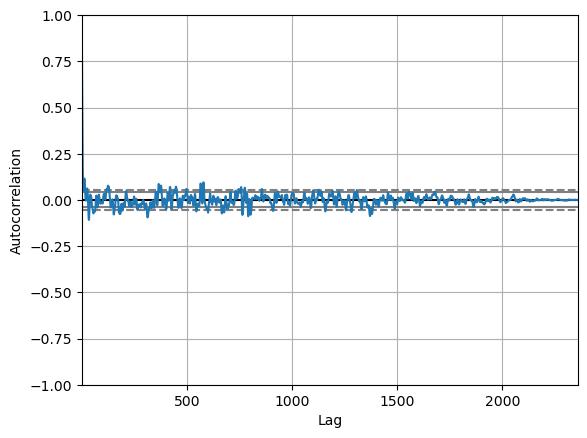

In [67]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

In [68]:
# Assurez-vous que votre index est de type datetime
series.index = pd.to_datetime(series.index)

# Définir la date de séparation entre l'ensemble d'entraînement et l'ensemble de test
split_date = '2022-01-04'

# Diviser les données en ensemble d'entraînement et ensemble de test
train_data = series.loc[series.index <= split_date]
test_data = series.loc[series.index > split_date]

# Vérifiez la taille de chaque ensemble
print("Taille de l'ensemble d'entraînement:", len(train_data))
print("Taille de l'ensemble de test:", len(test_data))


Taille de l'ensemble d'entraînement: 1886
Taille de l'ensemble de test: 473


Mean Squared Error sur l'ensemble de test: 0.00020947400570134754


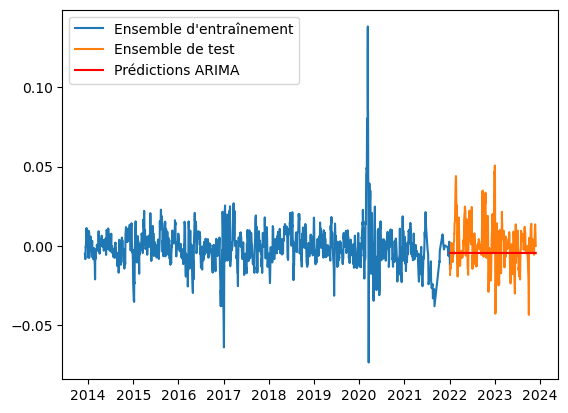

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Utilisez l'ensemble d'entraînement pour créer un modèle ARIMA
model_arima = ARIMA(train_data, order=(1, 1, 0))  # Remplacez p, d, et q par les ordres AR, différenciation et MA respectifs
result = model_arima.fit()

# Faites des prédictions sur l'ensemble de test
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = result.predict(start=start_index, end=end_index, dynamic=False, typ='levels')

# Évaluez le modèle
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error sur l\'ensemble de test: {mse}')

# Visualisez les prédictions par rapport aux données réelles
plt.plot(train_data.index, train_data, label='Ensemble d\'entraînement')
plt.plot(test_data.index, test_data, label='Ensemble de test')
plt.plot(test_data.index, predictions, label='Prédictions ARIMA', color='red')
plt.legend()
plt.show()

Mean Squared Error sur l'ensemble de test (AR): 0.00018222248178761518


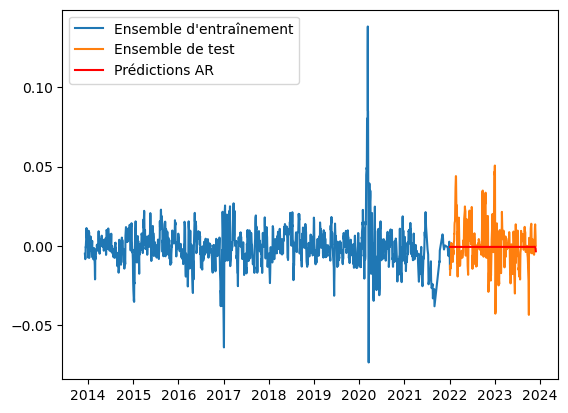

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Assurez-vous que votre index est de type datetime
series.index = pd.to_datetime(series.index)

# Définir la date de séparation entre l'ensemble d'entraînement et l'ensemble de test
split_date = '2022-01-04'

# Diviser les données en ensemble d'entraînement et ensemble de test
train_data = series.loc[series.index <= split_date]
test_data = series.loc[series.index > split_date]

# Choisissez l'ordre AR approprié (p)
order_AR = 2  # Remplacez par l'ordre AR souhaité

# Créer le modèle AR
model_ar = AutoReg(train_data, lags=order_AR)
results_ar = model_ar.fit()

# Faites des prédictions sur l'ensemble de test
predictions_ar = results_ar.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

# Évaluez le modèle
mse_ar = mean_squared_error(test_data, predictions_ar)
print(f'Mean Squared Error sur l\'ensemble de test (AR): {mse_ar}')

# Visualisez les prédictions par rapport aux données réelles
plt.plot(train_data.index, train_data, label='Ensemble d\'entraînement')
plt.plot(test_data.index, test_data, label='Ensemble de test')
plt.plot(test_data.index, predictions_ar, label='Prédictions AR', color='red')
plt.legend()
plt.show()


Mean Squared Error sur l'ensemble de test (ARIMA): 0.00020946045387523277


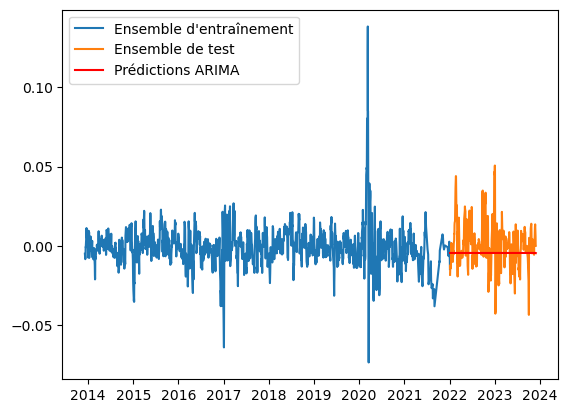

In [74]:
# Assurez-vous que votre index est de type datetime
series.index = pd.to_datetime(series.index)

# Définir la date de séparation entre l'ensemble d'entraînement et l'ensemble de test
split_date = '2022-01-04'

# Diviser les données en ensemble d'entraînement et ensemble de test
train_data = series.loc[series.index <= split_date]
test_data = series.loc[series.index > split_date]

# Choisissez les ordres ARIMA appropriés (p, d, q)
order_ARIMA = (2, 1, 1)  

# Créer le modèle ARIMA
model_arima = ARIMA(train_data, order=order_ARIMA)
results_arima = model_arima.fit()

# Faites des prédictions sur l'ensemble de test
predictions_arima = results_arima.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False, typ='levels')

# Évaluez le modèle
mse_arima = mean_squared_error(test_data, predictions_arima)
print(f'Mean Squared Error sur l\'ensemble de test (ARIMA): {mse_arima}')

# Visualisez les prédictions par rapport aux données réelles
plt.plot(train_data.index, train_data, label='Ensemble d\'entraînement')
plt.plot(test_data.index, test_data, label='Ensemble de test')
plt.plot(test_data.index, predictions_arima, label='Prédictions ARIMA', color='red')
plt.legend()
plt.show()